In [1]:
from modules.polyfit import Polyfit
from modules.paramtune import Paramtune
import jax.numpy as jnp
summer_fits = Polyfit('summer_data/fits.npz', input_h5='summer_data/inputdata.h5', order=3, covariance = True, num_bins = 350)

Filtered 782 of 134343 total bins for invalid input


Calculated inital guess:  [0.12885757]
Tuned Parameters:  [0.12875744] , Objective =  2927.889748128332 , chi2/ndf =  86.11440435671565
Covariance of Tuned Parameters:  [[2.18348045e-07]]
Calculated inital guess:  [0.12790236]
Tuned Parameters:  [0.12756325] , Objective =  38.48963572368604 , chi2/ndf =  1.1320481095201778
Covariance of Tuned Parameters:  [[2.51222853e-07]]
target deviation 37.3614, with confidence level 0.6827, edof 34.0000
target deviation 37.3614, with confidence level 0.6827, edof 34.0000
[1.0401 1.1434 1.2762 1.4341 1.5569 1.6412 1.871 ]
[1.0936 1.261  1.4708 1.7095 1.89   2.174  2.47  ]
[0.8092 0.9118 1.0205 1.1339 1.177  1.2731 1.357 ]
[1.4008 1.6348 1.9362 2.3156 2.605  3.     3.535 ]
[1.2145 1.6959 2.5076 3.7421 4.935  6.635  9.915 ]


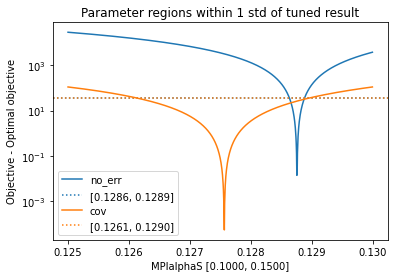

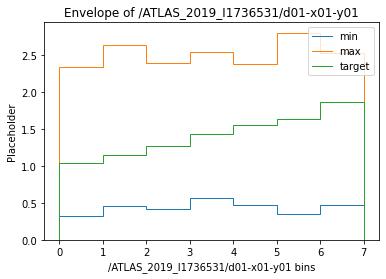

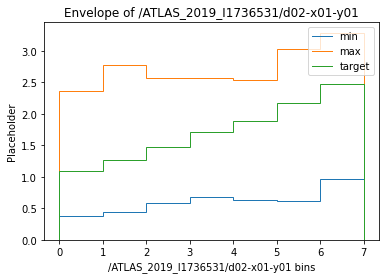

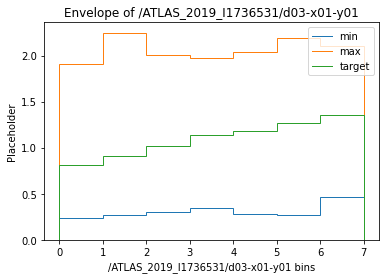

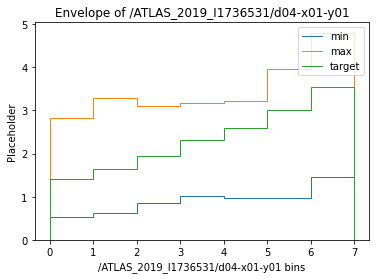

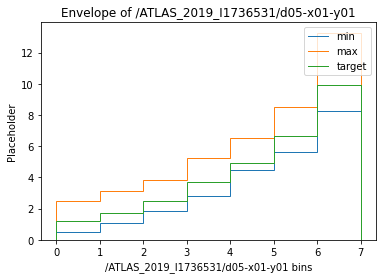

In [2]:
target_bins = jnp.array(range(40))
summer_tune_more = Paramtune('summer_data/fits.npz', 'summer_data/HEPData-ins1736531-v1-csv.h5', covariance = False, target_bins = target_bins)
summer_tune_more_cov = Paramtune('summer_data/fits.npz', 'summer_data/HEPData-ins1736531-v1-csv.h5', covariance = True, target_bins = target_bins)
graph_range = [0.125, 0.13]
summer_tune_more.graph_objective(graph_range = graph_range)
summer_tune_more_cov.graph_objective(new_figure = False, graph_range = graph_range)
summer_tune_more.graph_envelope_target()

In [ ]:
import matplotlib.pyplot as plt
cycle_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
summer_tune_more.graph_chi2_sample('summer_data/inputdata.h5', num_samples=100, sample_prop = 0.71,
 color = cycle_colors[0], save_file = 'summer_data/chi2results_no_err.json')
summer_tune_more_cov.graph_chi2_sample('summer_data/inputdata.h5', num_samples=100, sample_prop = 0.71,
 color = cycle_colors[1], save_file = 'summer_data/chi2results_cov.json', new_figure = False,
 save_figure = "summer_data/chi2_graph.pdf")
